In [1]:
# import packages
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio as rio
import pystac
import pystac_client
import stackstac
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime
import matplotlib
import ipyleaflet
import sys
import os
import dask_gateway
import dask
import planetary_computer
#from rechunker import rechunk
# path to 'sar_snowmelt_timing' directory'
sys.path.append('sar_snowmelt_timing')
import s1_rtc_bs_utils
import contextily as ctx
import rioxarray as rxr
#import skimage
import glob
import matplotlib.transforms as mtransforms
import re
import scipy
from pathlib import Path
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import os

In [2]:
# load bozeman creek geometry 
gj = os.path.join('bozeman_creek.geojson')
bbox_gdf = gpd.read_file(gj)

In [3]:
# years for analysis. Satellite launched and collected data starting in 2015
years = [2015,2016,2017,2018,2019,2020,2021,2022,2023,2024]


In [4]:
# use s1_rtc_bs_utils package to initialize start time, end time, polarization, spatial resolution
# this pulls the data form the planetary computer. 
# polarization vh and resolution 5m
ts_ds = s1_rtc_bs_utils.get_s1_rtc_stac_pc(bbox_gdf,
                                           start_time='2014-01-01',
                                           end_time=datetime.today().strftime('%Y-%m-%d'),
                                           polarization='vh',
                                           resolution=5)


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


In [5]:
# correct watershed boundary crs
bozeman_watershed = gpd.read_file('bozeman_creek.geojson').to_crs(ts_ds.crs)

# clip SAR output to watershed boundary 
ts_ds_clipped = ts_ds.rio.clip(bozeman_watershed.geometry,bozeman_watershed.crs)

# visualize boundary
bozeman_watershed.plot(vmin=80,vmax=230)

In [7]:
###  VH POLARIZATION 5M RESOLUTION ###

# process for each year 
# specify only 'melt season' months 
# for 2015 and 2016 only use vv - vh doesn't work 

for year in years:
    # to see which year is being processed
    print(f'Processing {year}...')
    # each year's melt season - maybe change this
    melt_year = slice(f'{year}-02-01',f'{year}-05-31')

    # analyze each year
    oneyear = ts_ds_clipped.sel(time=melt_year)
        
    # get medians
    runoffs = s1_rtc_bs_utils.get_runoff_onset(oneyear, num_acquisitions_during_melt_season=4)
    runoffs_computed = runoffs.compute()

    # get each year into tifs
    runoffs_computed.dt.dayofyear.rio.to_raster(f'output_vh_5/runoff_onset_{year}_vh_5.tif')


Processing 2015...


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/reductions.py:1113: RuntimeWarning: All-NaN slice encountered
  vals = func(x, axis=arg_axis, keepdims=True)
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/utils.py:78: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


Processing 2016...


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/utils.py:78: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


Processing 2017...


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/slicing.py:1089: PerformanceWarning: Increasing number of chunks by factor of 10
  p = blockwise(
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/reductions.py:1113: RuntimeWarning: All-NaN slice encountered
  vals = func(x, axis=arg_axis, keepdims=True)
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/utils.py:78: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


Processing 2018...


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/slicing.py:1089: PerformanceWarning: Increasing number of chunks by factor of 10
  p = blockwise(
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/reductions.py:1113: RuntimeWarning: All-NaN slice encountered
  vals = func(x, axis=arg_axis, keepdims=True)
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/utils.py:78: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


Processing 2019...


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/slicing.py:1089: PerformanceWarning: Increasing number of chunks by factor of 10
  p = blockwise(
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/reductions.py:1113: RuntimeWarning: All-NaN slice encountered
  vals = func(x, axis=arg_axis, keepdims=True)
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/utils.py:78: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


Processing 2020...


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/slicing.py:1089: PerformanceWarning: Increasing number of chunks by factor of 10
  p = blockwise(
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/slicing.py:1089: PerformanceWarning: Increasing number of chunks by factor of 10
  p = blockwise(
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/slicing.py:1089: PerformanceWarning: Increasing number of chunks by factor of 10
  p = blockwise(
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/reductions.py:1113: RuntimeWarning: All-NaN slice encountered
  vals = func(x, axis=arg_axis, keepdims=True)
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/utils.py:78: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


Processing 2021...


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/slicing.py:1089: PerformanceWarning: Increasing number of chunks by factor of 10
  p = blockwise(
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/slicing.py:1089: PerformanceWarning: Increasing number of chunks by factor of 10
  p = blockwise(
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/reductions.py:1113: RuntimeWarning: All-NaN slice encountered
  vals = func(x, axis=arg_axis, keepdims=True)
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/utils.py:78: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


Processing 2022...


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/slicing.py:1089: PerformanceWarning: Increasing number of chunks by factor of 10
  p = blockwise(
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/reductions.py:1113: RuntimeWarning: All-NaN slice encountered
  vals = func(x, axis=arg_axis, keepdims=True)
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/utils.py:78: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


Processing 2023...


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/slicing.py:1089: PerformanceWarning: Increasing number of chunks by factor of 10
  p = blockwise(
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/reductions.py:1113: RuntimeWarning: All-NaN slice encountered
  vals = func(x, axis=arg_axis, keepdims=True)
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/utils.py:78: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


Processing 2024...


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/array/reductions.py:1113: RuntimeWarning: All-NaN slice encountered
  vals = func(x, axis=arg_axis, keepdims=True)
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/utils.py:78: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


ValueError: Can't use axes when making faceted plots.

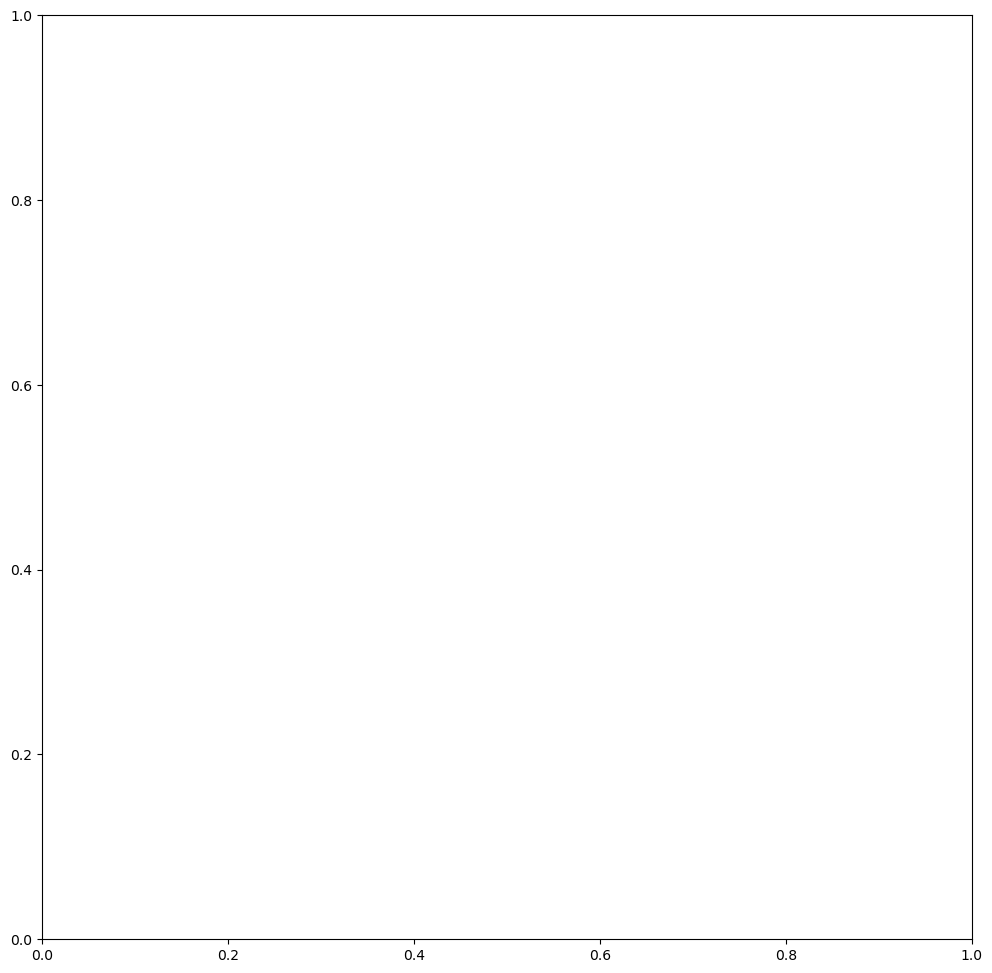

In [13]:
# compile geotiff list
geotiff_list = glob.glob(f'output_vh_5/runoff_onset_2*_vh_5.tif')

# make list of each year 
year_list = []
# iterate through geotiffs and append to year list
for geotiff in geotiff_list:
    year_list.append(re.search("([0-9]{4})", geotiff).group(0))
year_list = [int(year) for year in year_list]

# create variable used for time axis
time_var = xr.Variable('time', year_list)

# Load in and concatenate all individual GeoTIFFs
runoffs_allyears = xr.concat([rxr.open_rasterio(i) for i in geotiff_list],dim=time_var).squeeze().sortby('time')

# plot all years
runoffs_allyears.plot(col='time', col_wrap=5)

# Save the figure
plt.savefig("runoff_allyears_vh_5.png", dpi=300)

# meadian
#runoffs_allyears_median = runoffs_allyears.median(dim='time')
# standard deviation
#runoffs_allyears_std = runoffs_allyears.std(dim='time')
# polyfit
#polyfits = runoffs_allyears.polyfit('time',deg=1,full=True,cov=True)
# polyfit coefficeient 
#runoffs_allyears_corr = polyfits.polyfit_coefficients[0].rio.set_crs(runoffs_allyears.rio.crs)
# correlation stregth
#runoffs_allyears_corr_strength = xr.corr(runoffs_allyears.time,runoffs_allyears,dim='time').rio.set_crs(runoffs_allyears.rio.crs)


In [ ]:
# Path to your GeoTIFF files (adjust the path as needed)
geotiff_list = glob.glob(f'output_vh_5/runoff_onset_2*_vh_5.tif')

# Make list of each year by extracting the year from the filenames
year_list = []
for geotiff in geotiff_list:
    year = re.search("([0-9]{4})", geotiff).group(0)  # Extract year from the filename
    year_list.append(int(year))  # Append year as integer to year_list

# Sort the GeoTIFFs by year (this ensures the plots are in chronological order)
sorted_geotiff_list = [geotiff for _, geotiff in sorted(zip(year_list, geotiff_list), key=lambda pair: pair[0])]

# Create subplots (2 rows x 5 columns)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))  # Adjust figsize as necessary

# Iterate over each GeoTIFF and plot
for idx, (geotiff, ax) in enumerate(zip(sorted_geotiff_list, axes.flat)):
    # Open each GeoTIFF using rioxarray
    raster_data = rxr.open_rasterio(geotiff)
    
    # Plot the raster on the current axis
    img = raster_data.plot(ax=ax, cmap='viridis', add_colorbar=False)
    
    # Remove x and y ticks and labels
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xticklabels([])  # Remove x-axis labels
    ax.set_yticklabels([])  # Remove y-axis labels
    
    # Extract year from the filename (from sorted list, so it's in chronological order)
    title = re.search("([0-9]{4})", geotiff).group(0)  # Extract year
    ax.set_title(f"{title}", fontsize=10)

# Create a shared color bar with min and max values from all the raster data
vmin = 32 # Min value is the first day of the year (Day 1)
vmax = 145  # Max value is Day 365 (or 366 if it's a leap year)

# Add the color bar with the same colormap used in the plots
cbar = fig.colorbar(img, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# Set the color bar label
cbar.set_label('Day of Year')

# Adjust color bar ticks to correspond to the day of the year range
cbar_ticks = np.linspace(vmin, vmax, len(year_list))  # One tick per year (if desired)
cbar.set_ticks(cbar_ticks)  # Set the color bar ticks

# Set custom color bar labels (i.e., the days of the year)
cbar_labels = [f"Day {int(day)}" for day in np.linspace(vmin, vmax, len(year_list))]
cbar.set_ticklabels(cbar_labels)  # Set the labels on the color bar


# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("all_geotiffs_no_labels_sorted.png", dpi=300)

# Show the plot
plt.show()

In [11]:
# convert to median day of melt raster
runoffs_allyears_median.rio.to_raster(f'output/runoff_onset_allyears_median_{res}m.tif')

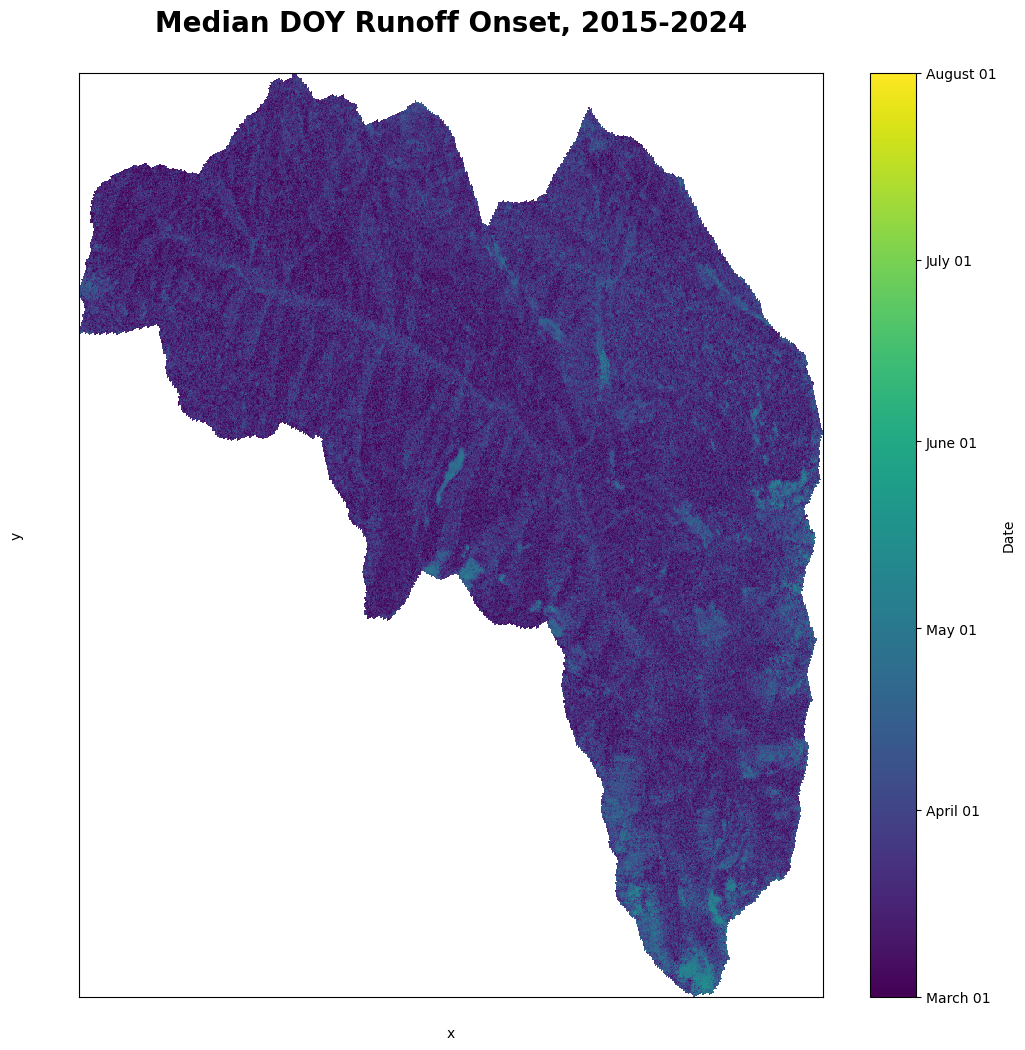

In [12]:
#plot median runoff DOY all years
f,ax=plt.subplots(figsize=(12,12))
# plot 
im = runoffs_allyears_median.plot(ax=ax,vmin=61,vmax=214,add_colorbar=False)

# make variable for date range for months of the year
s = pd.Series(pd.date_range("2020-1-1", periods=12, freq=pd.offsets.MonthBegin(1)))

# make a color bar with ticks 
cb = plt.colorbar(im, ticks=s.dt.dayofyear)
# tick labels for first of month
cb.ax.set_yticklabels(s.dt.strftime(date_format='%B %d'))
# label indicating color bar represents date
cb.set_label(label='Date') 

ax.set_title('Median DOY Runoff Onset, 2015-2024', pad = 30, fontsize= 20, fontweight ='bold')
ax.tick_params(left = False, bottom = False, labelcolor='white')

# save figure 
plt.savefig("full_runoff", dpi=300)